
#Name- Rhythm sethiya

#Roll No.- 57

#PRN- 1032212447

#Assignment No.- 6

#Decision Tree

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import graphviz
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving salaries.csv to salaries.csv


In [3]:
# Load the dataset
data = pd.read_csv('salaries.csv')

# Display the first few rows of the dataset
print("Dataset:")
print(data.head())

Dataset:
  company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = {
    'company': ['google', 'google', 'google', 'google', 'google', 'google', 'abc pharma', 'abc pharma', 'abc pharma', 'abc pharma', 'facebook', 'facebook', 'facebook', 'facebook', 'facebook', 'facebook'],
    'job': ['sales executive', 'sales executive', 'business manager', 'business manager', 'computer programmer', 'computer programmer', 'sales executive', 'computer programmer', 'business manager', 'business manager', 'sales executive', 'sales executive', 'business manager', 'business manager', 'computer programmer', 'computer programmer'],
    'degree': ['bachelors', 'masters', 'bachelors', 'masters', 'bachelors', 'masters', 'masters', 'bachelors', 'bachelors', 'masters', 'bachelors', 'masters', 'bachelors', 'masters', 'bachelors', 'masters'],
    'salary_more_then_100k': [0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
}

data = pd.DataFrame(data)

selected_features = ['company', 'job', 'degree', 'salary_more_then_100k']

X = data[selected_features]
y = data['salary_more_then_100k']

# Convert categorical variables into numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Function to plot confusion matrix heatmap
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [6]:
# Function to print results and return F1 score
def print_results(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"\n{title} Results:")
    print('Accuracy:', accuracy)
    print('F1 Score:', f1)
    print('Classification Report:\n', classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test, y_test, title)
    return f1


Decision Tree Results:
Accuracy: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



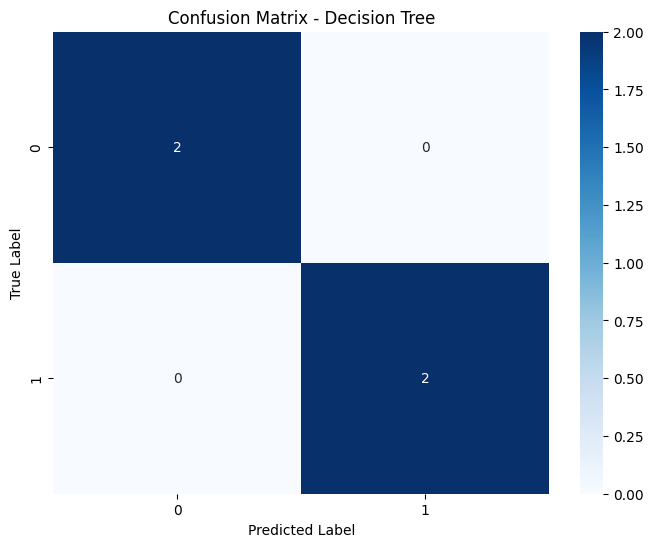

In [7]:
# Build and evaluate a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
f1_tree = print_results(tree_model, X_test, y_test, 'Decision Tree')



Random Forest Results:
Accuracy: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



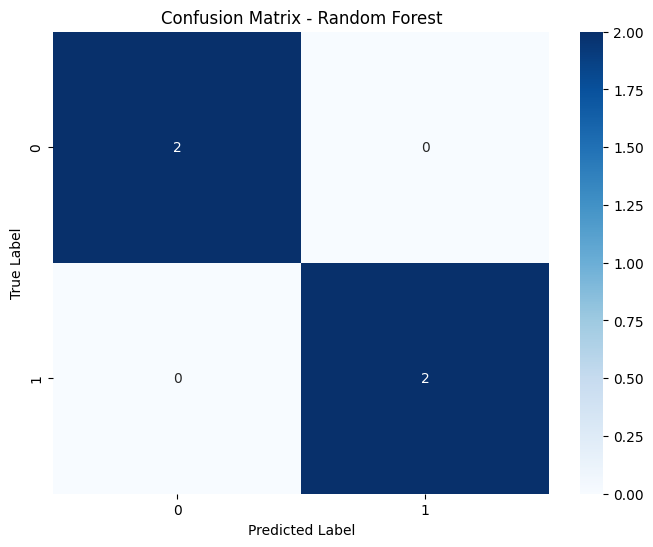

In [8]:
# Build and evaluate a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
f1_rf = print_results(rf_model, X_test, y_test, 'Random Forest')


Gradient Boosting Results:
Accuracy: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



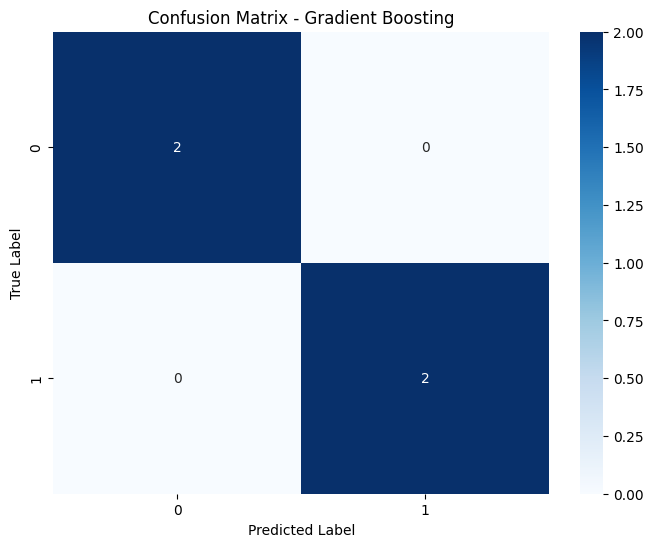

In [9]:
# Build and evaluate a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
f1_gb = print_results(gb_model, X_test, y_test, 'Gradient Boosting')



SVM Results:
Accuracy: 0.75
F1 Score: 0.7333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



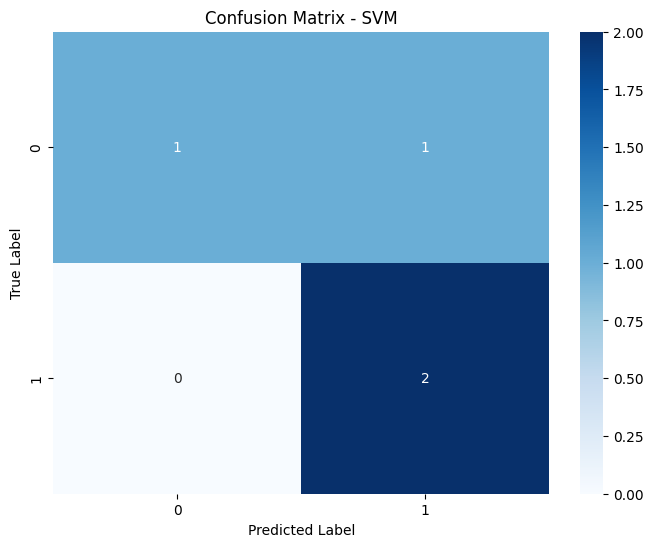

In [10]:
# Build and evaluate a Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
f1_svm = print_results(svm_model, X_test, y_test, 'SVM')


KNN Results:
Accuracy: 0.75
F1 Score: 0.7333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



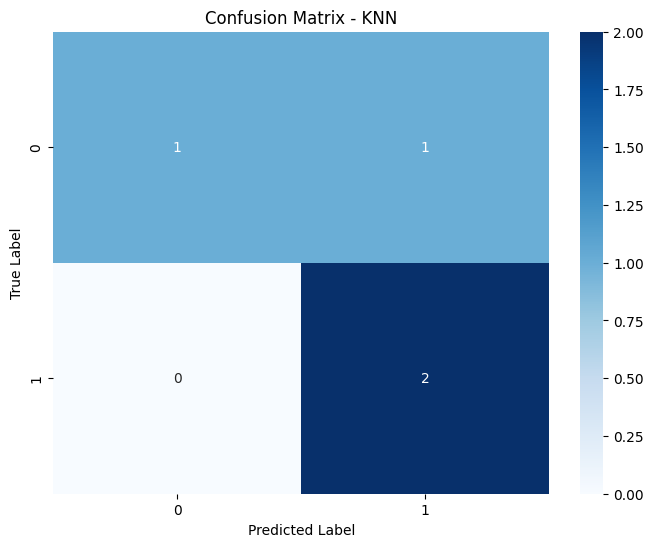

In [11]:
# Build and evaluate a K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
f1_knn = print_results(knn_model, X_test, y_test, 'KNN')


Logistic Regression Results:
Accuracy: 0.75
F1 Score: 0.7333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



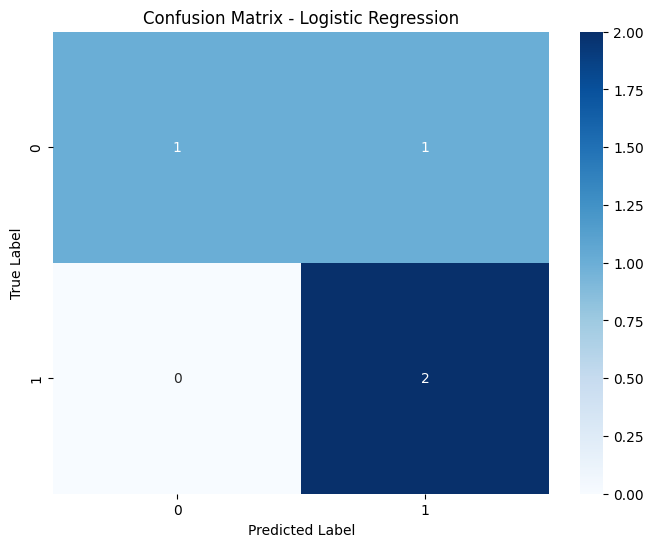

In [12]:
# Build and evaluate a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
f1_logreg = print_results(logreg_model, X_test, y_test, 'Logistic Regression')

In [13]:
# Print F1 scores for comparison
print("\nF1 Scores:")
print(f"Decision Tree: {f1_tree}")
print(f"Random Forest: {f1_rf}")
print(f"Gradient Boosting: {f1_gb}")
print(f"SVM: {f1_svm}")
print(f"KNN: {f1_knn}")
print(f"Logistic Regression: {f1_logreg}")


F1 Scores:
Decision Tree: 1.0
Random Forest: 1.0
Gradient Boosting: 1.0
SVM: 0.7333333333333334
KNN: 0.7333333333333334
Logistic Regression: 0.7333333333333334
